In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters, measure, morphology, segmentation
from skimage.segmentation import clear_border
from scipy import ndimage as ndi
from skimage.filters import sobel
from PIL import Image

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving koin.jpg to koin (1).jpg


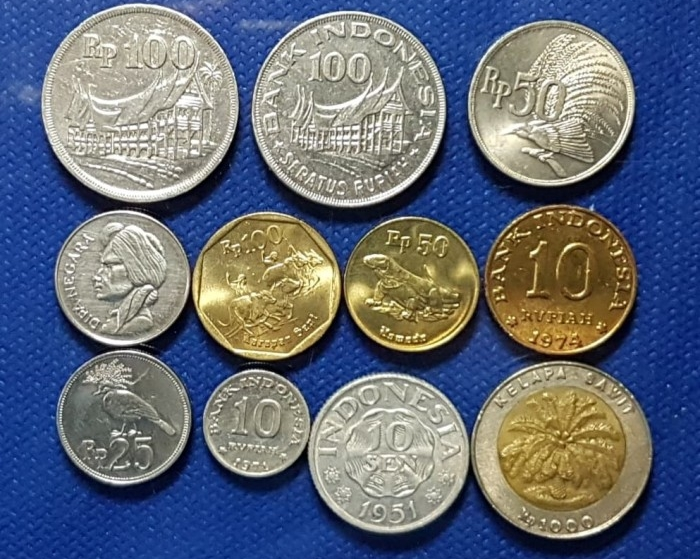

In [ ]:
image = Image.open("koin.jpg")
image

Konversi ke grayscale

In [ ]:
image_array = np.array(image)
gray = color.rgb2gray(image_array) # Membuat gambar berwarna menjadi grayscale

Sobel Gradient

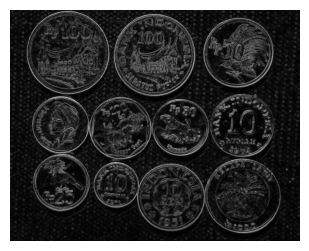

In [ ]:
elevation_map = sobel(gray) # Pengaplikasikan filter sobel untuk mendeteksi tepi -> menghasilkan elevation map

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_axis_off()
plt.show()

Region-based Segmentation menggunakan Threshold Otsu

In [ ]:
thresh = filters.threshold_otsu(gray) # Threshold Otsu -> memisahkan foreground dan background dalam gambar
thresh

0.443359375

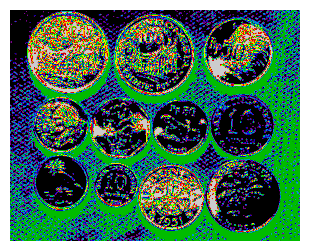

In [ ]:
# Membuat markers berdasarkan nilai Threshold Otsu
markers = np.zeros_like(gray, dtype=np.int32)
markers[gray < thresh/2] = 1 # Pixel yang lebih gelap (berbeda ekstrem) akan ditandai dengan label 1
markers[gray > thresh*1.5] = 2 # Pixel yang lebih terang (berbeda ekstrem) akan ditandai dengan label 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_axis_off()
plt.show()

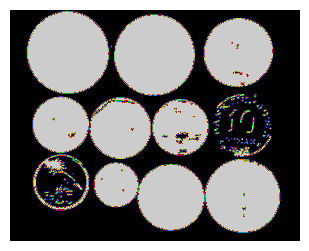

In [ ]:
segmentation_coins = segmentation.watershed(elevation_map, markers) # Segmentasi Watershed -> memisahkan objek dari latar belakang

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.nipy_spectral)
ax.set_axis_off()
plt.show()

In [ ]:
labeled = measure.label(segmentation_coins) # Melabeli setiap objek yang terdeteksi dari hasil segmentasi
regions = measure.regionprops(labeled) # Mengambil karakteristik dari setiap objek yang berhasil dilabeli, seperti area dan centroid
areas = np.array([region.area for region in measure.regionprops(labeled)]) # Mengumpulkan area dari objek yang dilabeli

In [ ]:
min_area = areas.mean()
regions = [region for region in regions if region.area >= min_area] # Mengambil objek yang hanya berukuran lebih besar dari rata-rata objek yang dilabeli

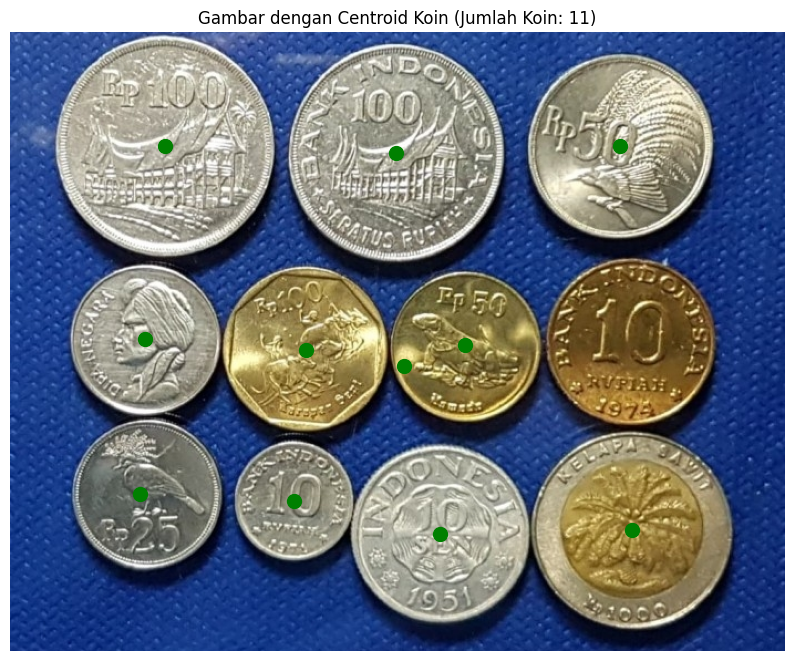

In [ ]:
num_coins = len(regions) # Menghitung koin berdasarkan centroid yang terbentuk

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_array)

for region in regions:
    y, x = region.centroid
    ax.plot(x, y, 'go', markersize=10)

ax.set_title(f'Gambar dengan Centroid Koin (Jumlah Koin: {num_coins})')
ax.axis('off')

plt.show()

Region-based Segmentation menggunakan Persentil

In [ ]:
low = np.percentile(gray, 5) # Mengambil 5% pixel terendah
high = np.percentile(gray, 95) # Mengambil 5% pixel tertinggi

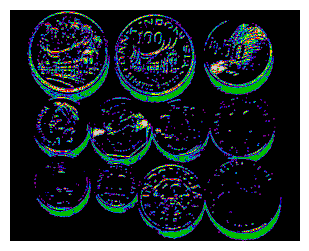

In [ ]:
markers = np.zeros_like(gray, dtype=np.int32)
markers[gray < low] = 1
markers[gray > high] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_axis_off()
plt.show()

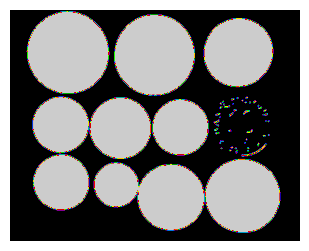

In [ ]:
segmentation_coins = segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.nipy_spectral)
ax.set_axis_off()
plt.show()

In [ ]:
labeled = measure.label(segmentation_coins)
regions = measure.regionprops(labeled)
areas = np.array([region.area for region in measure.regionprops(labeled)])

In [ ]:
min_area = areas.mean()
regions = [region for region in regions if region.area >= min_area]

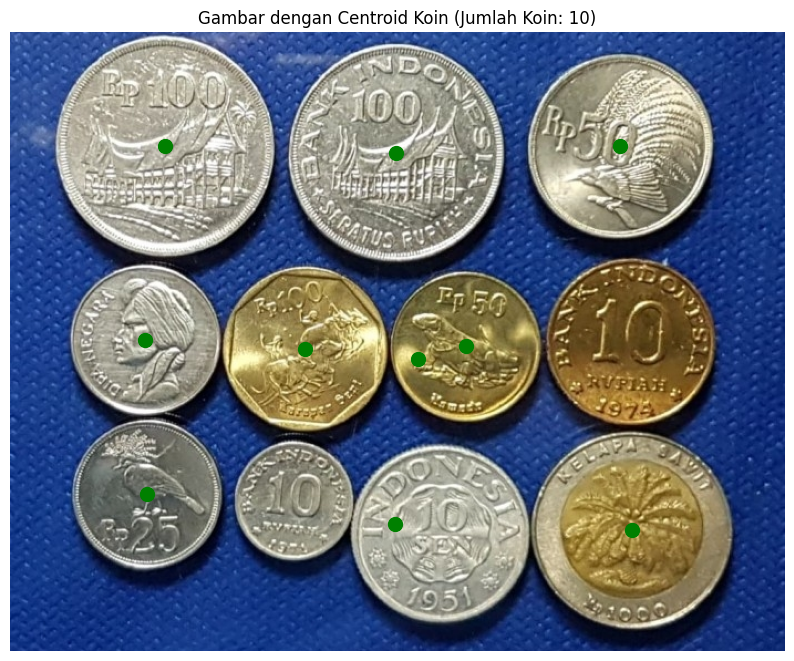

In [ ]:
num_coins = len(regions)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_array)

for region in regions:
    y, x = region.centroid
    ax.plot(x, y, 'go', markersize=10)

ax.set_title(f'Gambar dengan Centroid Koin (Jumlah Koin: {num_coins})')
ax.axis('off')

plt.show()

Region-based Segmentation menggunakan Histogram

In [ ]:
from scipy import signal

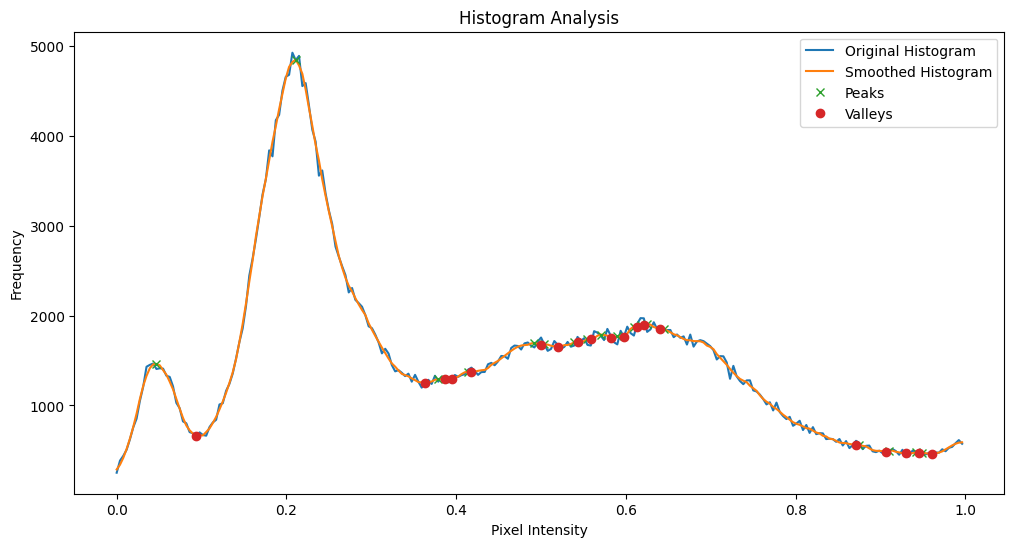

In [ ]:
hist, bin_edges = np.histogram(gray, bins=256)
smoothed = signal.savgol_filter(hist, 11, 3) # Menghaluskan histogram
peaks, _ = signal.find_peaks(smoothed) # Mendeteksi puncak pada histogram
valleys, _ = signal.find_peaks(-smoothed) # Mendeteksi lembah pada histogram

plt.figure(figsize=(12, 6))
plt.plot(bin_edges[:-1], hist, label='Original Histogram')
plt.plot(bin_edges[:-1], smoothed, label='Smoothed Histogram')
plt.plot(bin_edges[:-1][peaks], smoothed[peaks], "x", label='Peaks')
plt.plot(bin_edges[:-1][valleys], smoothed[valleys], "o", label='Valleys')
plt.legend()
plt.title('Histogram Analysis')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

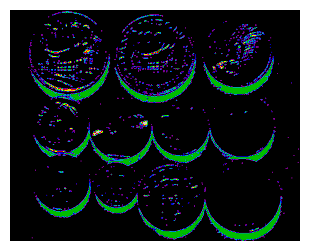

In [ ]:
lower_bound = bin_edges[valleys[0]] # Mengambil lembah pertama
upper_bound = bin_edges[valleys[-1]] # Mengambil lembah terakhir

markers = np.zeros_like(gray, dtype=np.int32)
markers[gray < lower_bound] = 1
markers[gray > upper_bound] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_axis_off()
plt.show()

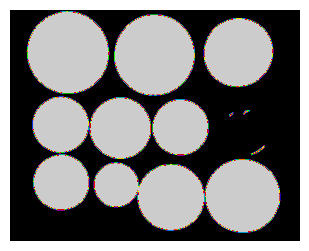

In [ ]:
segmentation_coins = segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.nipy_spectral)
ax.set_axis_off()
plt.show()

In [ ]:
labeled = measure.label(segmentation_coins)
regions = measure.regionprops(labeled)
areas = np.array([region.area for region in measure.regionprops(labeled)])

In [ ]:
min_area = areas.mean()
regions = [region for region in regions if region.area >= min_area]

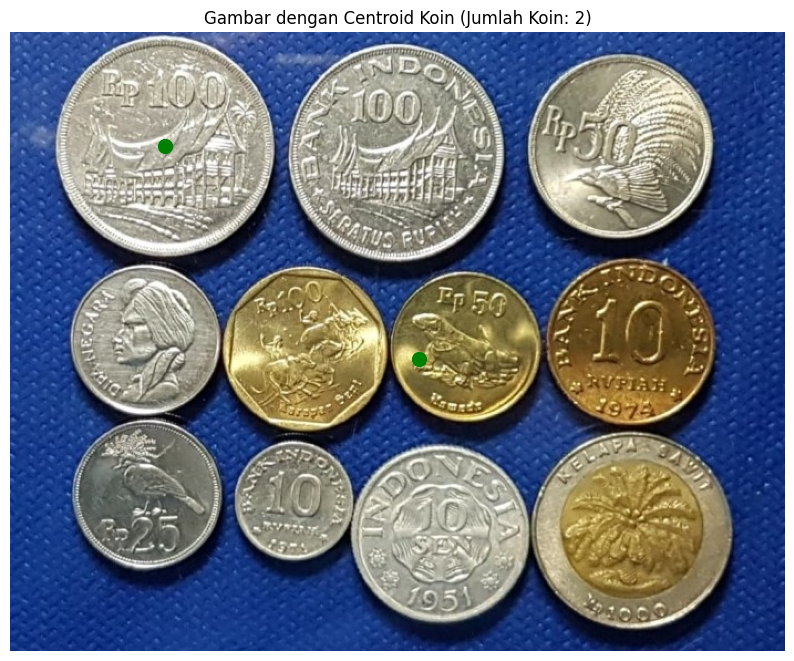

In [ ]:
num_coins = len(regions)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_array)

for region in regions:
    y, x = region.centroid
    ax.plot(x, y, 'go', markersize=10)

ax.set_title(f'Gambar dengan Centroid Koin (Jumlah Koin: {num_coins})')
ax.axis('off')

plt.show()